### Library Installation
** pip
- pip는 Pip Installs Packages의 약자인데 파이썬 패키지를 설치하고 관리하는 매니저라고 보면 됩니다.
- Python 2 버전은 pip, Python 3 버전은 pip3 를 사용합니다.
- Python 2.7.9 이후 버전과 Python 3.4 이후 버전을 사용하고 계시다면 pip가 내장되어 있어 따로 pip를 설치할 필요가 없습니다. 이전 버전이라면 설치하셔야 해요.

In [ ]:
# 셀 단위 실행 : Ctrl+Enter
!pip install pandas
!pip install numpy
!pip install wordcloud
!pip install matplotlib

** KoNLPy 설치법
- https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/#id2

** KoNLPy 사용법
- https://yeoeun-ji.tistory.com/65

** 정규식 사용법
- https://at0z.tistory.com/25

In [11]:
!pip install --upgrade pip
!pip install konlpy
!pip install selenium

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)


### import

In [48]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from bs4 import BeautifulSoup   # HTML 해석
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By


### Crawling
* 크롤링을 위해 크롬 드라이버 설치 : https://chromedriver.chromium.org/downloads<br>
-> 자신의 크롬버전 및 운영체제와 동일한 드라이버 다운로드<br>
-> 크롬버전 : 크롬 우측 상단 -> 설정 -> Chrome 정보 -> 버전 확인<br>
-> 다운로드한 드라이버 압축 해제 -> chromedriver.exe 파일을 .py(.ipynb) 파일과 동일한 경로에 두기

In [67]:
name = '우성현'
birth = '19951130'
driver = webdriver.Chrome() # 브라우저 실행

In [68]:
# 로그인
driver.implicitly_wait(3)
driver.get('https://conf.kiee.or.kr/users/login_archives.vm?rtn=/archives/')
login_x_path = '//*[@id="loginFormGuest"]/div/button'
driver.find_element(By.NAME, 'name').send_keys(name)
driver.find_element(By.NAME, 'birth').send_keys(birth)
driver.find_element(By.XPATH, login_x_path).click()

In [56]:
# parsing을 위한 함수 생성
def remove_html_tags(data):
    p = re.compile(r'<.*?>')
    return p.sub(' ', str(data))

def get_crawl(URL):
    response = driver.get(URL)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    crawl_data1 = remove_html_tags(soup.findAll('p',{'class':'title title'}))
    crawl_data2 = remove_html_tags(soup.findAll('p',{'class':'title title2'}))
    return crawl_data1+crawl_data2

In [69]:
content = ''
url_sample = 'https://conf.kiee.or.kr/archives/?part={}'

for part in ['K','A','B','C','D','E','I']:
    try:
        url=url_sample.format(part)
        content+=get_crawl(url).strip()
    except:
        continue

### Text Preprocessing

In [71]:
# 방법 1) 한글을 제외한 문자 제거
hangul = re.compile('[^ ㄱ-ㅣ가-힣+]')
preprocessed_KO = hangul.sub('',content)
preprocessed_KO

'   이중 패턴형 원형  코일에 대한  시뮬레이션                 교류케이블과 평판형 코어를 채용한 공진형 컨버터                 전극 구조 및 알고리즘을 이용한 커패시티브 무선전력전송 최적화 연구                  감쇄를 위한 무선전력전송 시스템 설계                  주파수 대역에서의 고효율 무선전력전송을 위한 단일층  원형 코일에 대한 근접 효과 해석                   프로토콜을 준용하고 사각 코일을 사용한 급 무선전력조명 제작                  국제규격 현황 분석 및 사례                 공진형 직류직류 컨버터를 사용한 고전력 무선전력전송 연구                 실내 환경  모델 기반 공간 무선전력전송 시스템 성능 분석 위한 시뮬레이션 방법                 자동차 시트용 롱레일 무선전력전송 시스템의 인체 영향 분석                 이산적 차분정보보호법이 결합된 개인정보보호의 심층강화학습 기반 전기차 충전소 예약시스템                  전세계 스마트그리드의 동인과 기술 동향 조사 분석                 배전  확보를 위한  이용 부하 및 발전량 이력관리 활용 방법                 전기버스 운행 특성을 고려한 스마트 차징                 전기자동차 무선 충전 시스템의 고효율 동작을 위한 최적 임피던스 매칭 기법 선정                  운전자 인식조사 기반  서비스 여건 분석                 실주행 전기자동차 데이터를 이용한 배터리 충전상태 및 용량 감소 연구                 전기차 직류 릴레이용 소호가스의 차단성능 측정                  보상 네트워크를 적용한 전기자동차용 양방향 무선 충전 시스템 설계                 마이크로그리드의 운전 모드에 따른 대규모 전력 시스템의 주파수 안정도 분석                  

In [72]:
# 방법 2) 한글, 영어를 제외한 문자 제거
EN_KO = re.compile('[^ A-Za-z가-힣+]')
preprocessed_EN_KO = EN_KO.sub('',content)
preprocessed_EN_KO

'   이중 패턴형 원형 PCB 코일에 대한 Qfactor 시뮬레이션                 교류케이블과 평판형 코어를 채용한 공진형 컨버터                 전극 구조 및 알고리즘을 이용한 커패시티브 무선전력전송 최적화 연구                 EMI 감쇄를 위한 무선전력전송 시스템 설계                 MHz 주파수 대역에서의 고효율 무선전력전송을 위한 단일층 PCB 원형 코일에 대한 근접 효과 해석                 WPC Qi 프로토콜을 준용하고 사각 코일을 사용한 W급 무선전력조명 제작                 WPCQi 국제규격 현황 분석 및 사례                 공진형 직류직류 컨버터를 사용한 고전력 무선전력전송 연구                 실내 환경 D 모델 기반 공간 무선전력전송 시스템 성능 분석 위한 시뮬레이션 방법                 자동차 시트용 롱레일 무선전력전송 시스템의 인체 영향 분석                 이산적 차분정보보호법이 결합된 개인정보보호의 심층강화학습 기반 전기차 충전소 예약시스템                  전세계 스마트그리드의 동인과 기술 동향 조사 분석                 배전 Visibility 확보를 위한 ADMS 이용 부하 및 발전량 이력관리 활용 방법                 전기버스 운행 특성을 고려한 스마트 차징                 전기자동차 무선 충전 시스템의 고효율 동작을 위한 최적 임피던스 매칭 기법 선정                 EV 운전자 인식조사 기반 VGI 서비스 여건 분석                 실주행 전기자동차 데이터를 이용한 배터리 충전상태 및 용량 감소 연구                 전기차 직류 릴레이용 소호가스의 차단성능 측정                 LCCLCC 보상 네트워크를 적용한 전기자동차용 양방향 무선 충전 시스템 설계                 마이크

### 형태소 분석 및 불용어 제거

In [73]:
## Open Korea Text -> Pos(문자열, 품사)
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(preprocessed_EN_KO)  # 명사만 추출
count = Counter(nouns)

In [77]:
## 한글자 키워드 제거(의미없는 경우 많음)
remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})

## 불용어 사전을 통해 키워드 제거
# .py(.iypnb) 파일과 같은 경로에 있어야 함
# 다른 경로에 있는 경우 절대 경로로 설정
korean_stopwords_path = "korean_stopwords.txt"  
with open(korean_stopwords_path, encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords and remove_char_counter[x]!=0})

# 가장 출현 빈도수가 높은 30개 추출
result = remove_char_counter.most_common(50)
result

[('연구', 389),
 ('분석', 212),
 ('시스템', 171),
 ('기반', 171),
 ('전력', 169),
 ('이용', 131),
 ('설계', 128),
 ('특성', 118),
 ('계통', 115),
 ('개발', 108),
 ('제어', 100),
 ('방안', 93),
 ('활용', 83),
 ('적용', 82),
 ('대한', 74),
 ('고려', 68),
 ('개선', 63),
 ('통한', 59),
 ('기법', 58),
 ('배전', 57),
 ('기술', 56),
 ('전류', 56),
 ('방법', 55),
 ('성능', 54),
 ('운영', 54),
 ('알고리즘', 53),
 ('해석', 52),
 ('에너지', 52),
 ('예측', 50),
 ('평가', 50),
 ('변압기', 49),
 ('최적', 48),
 ('고장', 48),
 ('영향', 46),
 ('시험', 46),
 ('사례', 45),
 ('용량', 45),
 ('전압', 45),
 ('영구자석', 45),
 ('고찰', 45),
 ('모델', 43),
 ('절연', 43),
 ('진단', 42),
 ('설비', 42),
 ('태양광', 40),
 ('케이블', 39),
 ('전동기', 39),
 ('선로', 39),
 ('송전', 38),
 ('전기', 37)]

### 워드 클라우드 생성

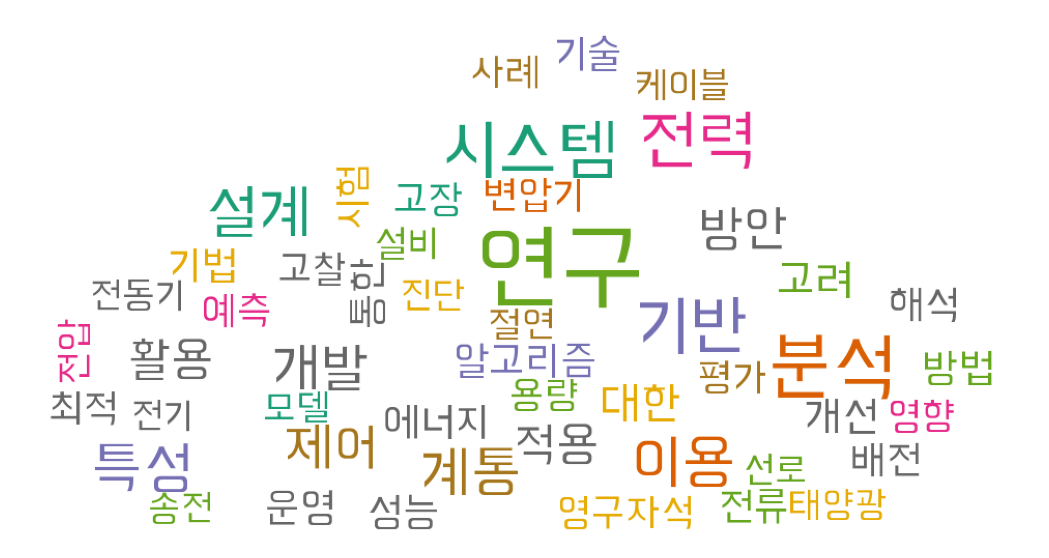

In [79]:
# 폰트 설정, 같은 경로에 위치
font='BMHANNAAir_ttf.ttf'

# 백그라운드 마스크
mask = np.array(Image.open('mask.png'))

# 워드 클라우드 생성
word_cloud = WordCloud(font_path=font, background_color='white',mask = mask, width=1600, height=800,max_font_size=100, colormap='Dark2')
word_cloud.generate_from_frequencies(dict(result))

# Drawing WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis("off")

# Save Image
plt.savefig("Word_Cloud.png", bbox_inches='tight')
    

Accent
Blues
BrBG
BuGn
BuPu
CMRmap
Dark2
GnBu
Greens
Greys
OrRd
Oranges
PRGn
Paired
Pastel1
Pastel2
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Set1
Set2
Set3
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
tab10
tab20
tab20b
tab20c
terrain
winter


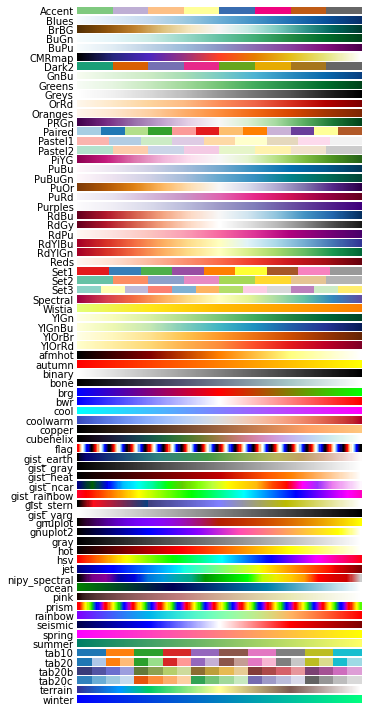

In [15]:
a = np.linspace(0, 1, 256).reshape(1, -1)       # (1, 256)
a = np.vstack((a,a))                            # (2, 256)

# colormap 목록 표시. '_r'로 끝나는 이름은 reverse 버전.
maps = sorted(m for m in plt.cm.datad if not m.endswith('_r'))
nmaps = len(maps) + 1
print(*maps, sep='\n')

fig = plt.figure(figsize=(5, 10))
fig.subplots_adjust(top=0.99, bottom=0.01, left=0.2, right=0.99)

for i, m in enumerate(maps, 1):
    ax = plt.subplot(nmaps, 1, i)
    plt.axis("off")         # 가로축과 세로축에 표시되는 숫자 및 테두리 제거

    plt.imshow(a, aspect='auto', cmap=plt.get_cmap(m), origin='lower')

    # subplot 영역 계산. x, 너비, 높이는 같고, y만 바뀜.
    bounds = list(ax.get_position().bounds)
    x, y, cx, cy = bounds

    # y축에 출력되는 colormap 이름이 y축에 달라붙지 않도록 간격 띄움.
    # 정렬(left, center, right)은 x 좌표가 왼쪽, 가운데, 오른쪽에 있음을 명시하는 것임.
    # right를 줬다면 출력 문자열의 오른쪽에 x 좌표가 오게 된다.
    fig.text(x - 0.01, y, m, fontsize=10, horizontalalignment='right')

plt.show()
